### lecture 10 - forecasting models

In [49]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from statsmodels.tsa.holtwinters import ExponentialSmoothing # type: ignore
from sklearn.metrics import mean_squared_error,mean_absolute_error # type: ignore
from statsmodels.tsa.statespace.tools import diff # type: ignore

In [14]:
df = pd.read_csv('./dataset/airline_passengers.csv',index_col='Month',parse_dates=True)

In [15]:
df.index.freq = 'MS'

In [16]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


#### train and test set

In [19]:
train_data = df.iloc[:109]

In [20]:
test_data = df.iloc[108:]

#### model

In [22]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


#### predictions

In [23]:
test_predictions = fitted_model.forecast(36) # 12 periods into the future

In [25]:
test_predictions.head()

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

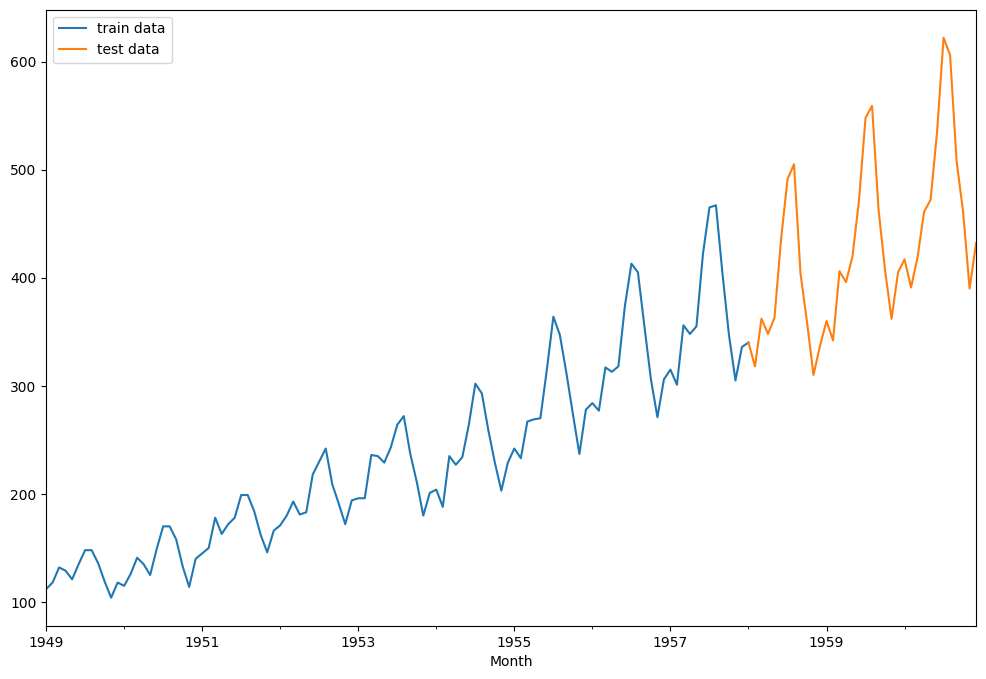

In [28]:
train_data['Thousands of Passengers'].plot(legend=True,label='train data',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='test data',figsize=(12,8))

<Axes: xlabel='Month'>

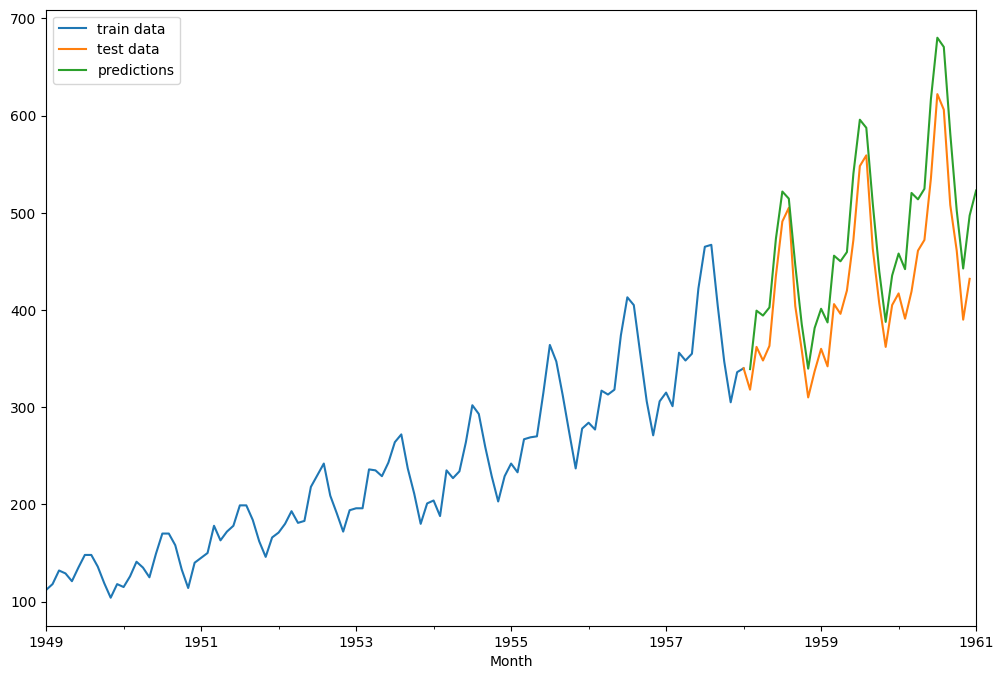

In [29]:
train_data['Thousands of Passengers'].plot(legend=True,label='train data',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='test data',figsize=(12,8))
test_predictions.plot(legend=True,label='predictions')

<Axes: xlabel='Month'>

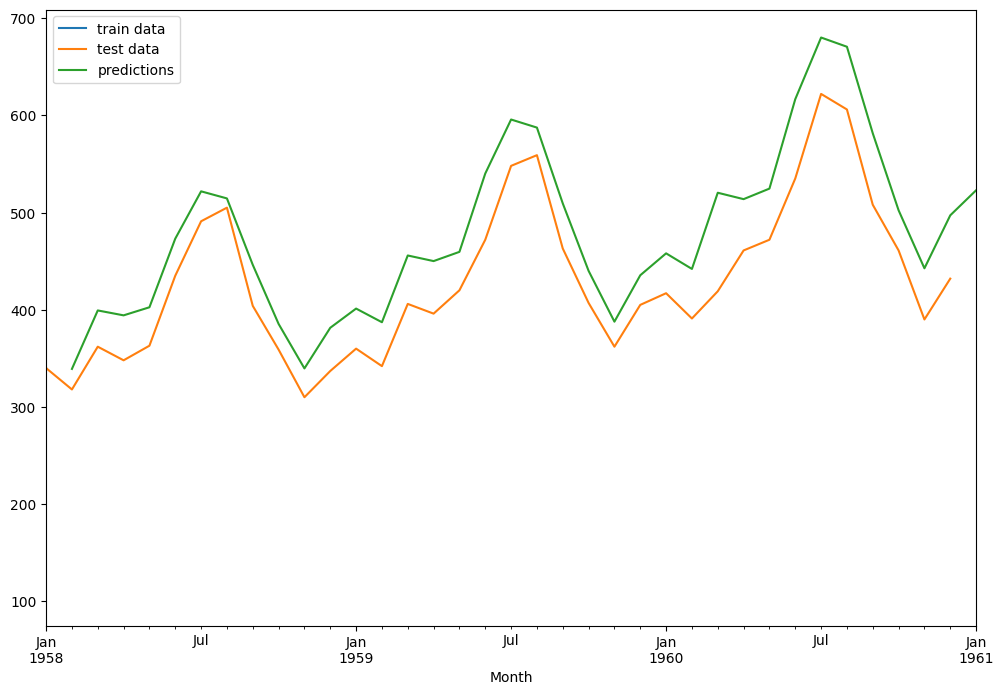

In [30]:
train_data['Thousands of Passengers'].plot(legend=True,label='train data',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='test data',figsize=(12,8))
test_predictions.plot(legend=True,label='predictions',xlim=['1958-01-01','1961-01-01'])

#### evaluation metrics

* mean absolute error
* mean squared error
* root mean squared error

In [36]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [35]:
mean_absolute_error(test_data,test_predictions)

63.03104082299123

In [34]:
mean_squared_error(test_data,test_predictions)

5614.236501157957

In [37]:
np.sqrt(mean_squared_error(test_data,test_predictions)) 

74.92820898138402

we can see thath the root mean squared error is less than the standard deviation of the test data, which is 79.3, so we are performing some good predictions

#### forecast into the future

In [38]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                   trend='mul',
                                   seasonal='mul',
                                   seasonal_periods=12).fit()

c:\Users\adepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [39]:
forecast_predictions = final_model.forecast(36) # forecast 3 year ahead

<Axes: xlabel='Month'>

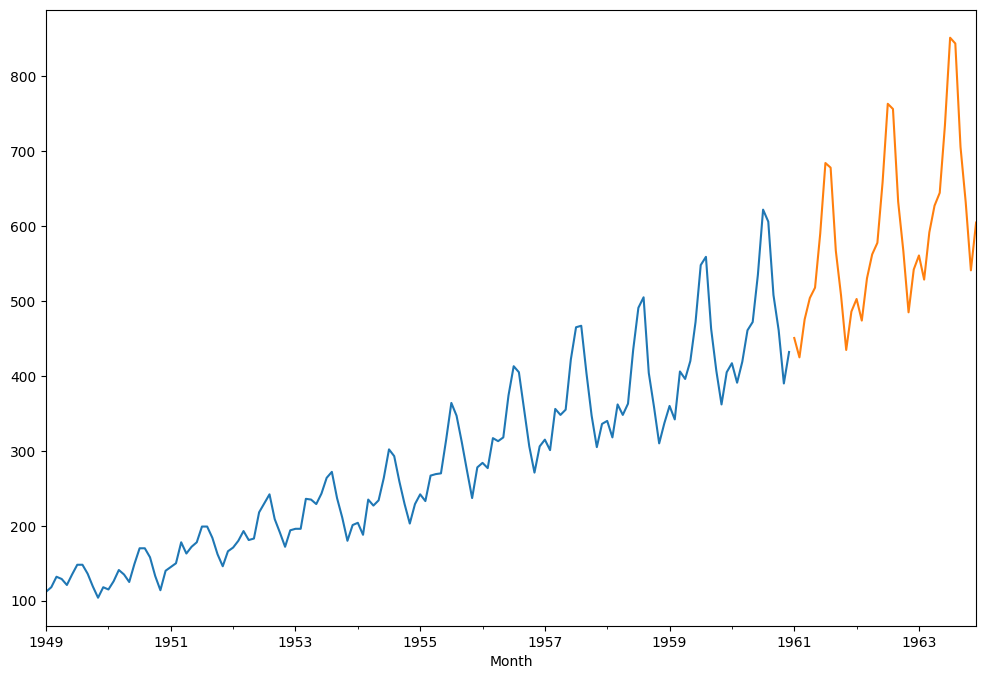

In [40]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

predictions are quite reasonable since they keep the seasonality effect and the growing trend

#### stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time

In [42]:
df2 = pd.read_csv('./dataset/samples.csv',index_col=0,parse_dates=True)

In [43]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

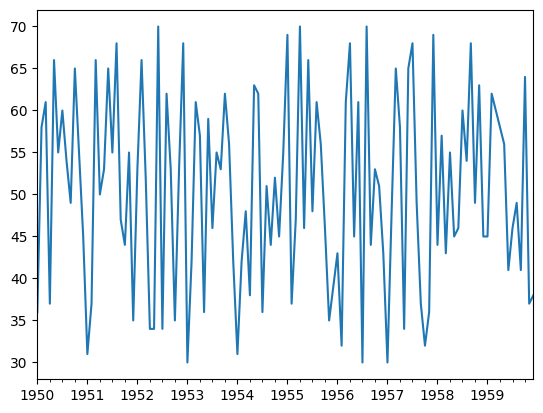

In [47]:
df2['a'].plot() # no seasonality or trend --> stationary data

<Axes: >

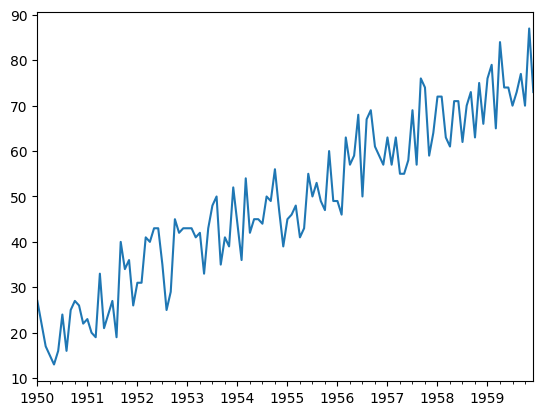

In [48]:
df2['b'].plot() # no seasonality but there is a trend --> non stationary data

#### first order differencing

Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.

In [50]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [52]:
diff(df2['b'],k_diff=1) # same as before but using the built-in function of statsmodels

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<Axes: >

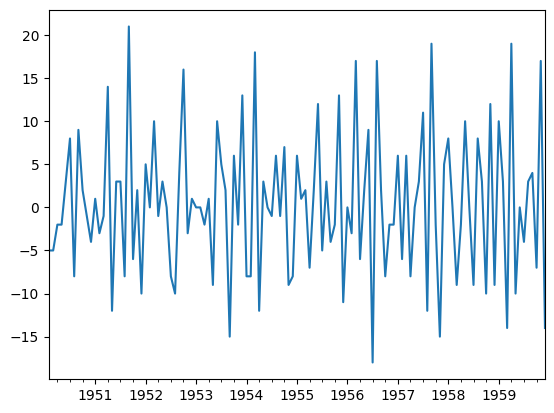

In [53]:
diff(df2['b'],k_diff=1).plot()

after taking the first difference, the data from the 'b' column which we said before to be non stationary now can be labeled as stationary as the trend component is disappeared